In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

In [3]:
df = pd.read_csv("train.csv")

In [7]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
df['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

In [12]:
df_1 = df[df['Yr Sold'] == 2006]

In [31]:
df1 = df_1.SalePrice.mean()

In [18]:
df_2 = df[df['Yr Sold'] == 2007]

In [32]:
df2 = df_2.SalePrice.mean()

In [21]:
df_3 = df[df['Yr Sold'] == 2008]

In [33]:
df3 = df_3.SalePrice.mean()

In [26]:
df_4 = df[df['Yr Sold'] == 2009]

In [34]:
df4 = df_4.SalePrice.mean()

In [29]:
df_5 = df[df['Yr Sold'] == 2010]

In [35]:
df5 = df_5.SalePrice.mean()

(array([1., 0., 0., 0., 1., 0., 1., 1., 0., 1.]),
 array([174180.05982906, 175314.50525178, 176448.95067449, 177583.39609721,
        178717.84151993, 179852.28694264, 180986.73236536, 182121.17778808,
        183255.62321079, 184390.06863351, 185524.51405622]),
 <a list of 10 Patch objects>)

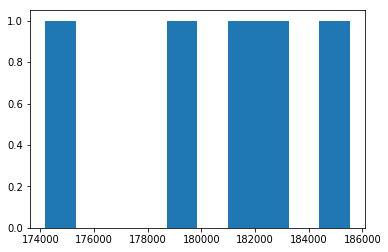

In [46]:
plt.hist([df1, df2, df3, df4, df5], histtype='bar', bins = 10)

In [3]:
df.drop(['PID'], axis = 1, inplace = True)

In [4]:
#'Bedroom AbvGr', 'Kitchen AbvGr','Lot Area', 'Garage Area', 'SF'

In [5]:
df = df[df['1st Flr SF'] < 3000]

In [6]:
df = df[df['Lot Area'] < 30000]

In [7]:
df = df[df['BsmtFin SF 1'] > 1]

In [8]:
df['Kitchen Qual'].replace(to_replace = 'Ex', value = 10, inplace = True)
df['Kitchen Qual'].replace(to_replace = 'Gd', value = 6, inplace = True)
df['Kitchen Qual'].replace(to_replace = 'TA', value = 3, inplace = True)
df['Kitchen Qual'].replace(to_replace = 'Fa', value = 1, inplace = True)
df['Kitchen Qual'].replace(to_replace = 'Po', value = 0, inplace = True)

In [9]:
df['Heating QC'].replace(to_replace = 'Ex', value = 10, inplace = True)
df['Heating QC'].replace(to_replace = 'Gd', value = 6, inplace = True)
df['Heating QC'].replace(to_replace = 'TA', value = 3, inplace = True)
df['Heating QC'].replace(to_replace = 'Fa', value = 1, inplace = True)
df['Heating QC'].replace(to_replace = 'Po', value = 0, inplace = True)

In [10]:
df['Exter Cond'].replace(to_replace = 'Ex', value = 10, inplace = True)
df['Exter Cond'].replace(to_replace = 'Gd', value = 5, inplace = True)
df['Exter Cond'].replace(to_replace = 'TA', value = 2, inplace = True)
df['Exter Cond'].replace(to_replace = 'Fa', value = 0, inplace = True)
df['Exter Cond'].replace(to_replace = 'Po', value = 0, inplace = True)

In [11]:
df['Exter Qual'].replace(to_replace = 'Ex', value = 10, inplace = True)
df['Exter Qual'].replace(to_replace = 'Gd', value = 5, inplace = True)
df['Exter Qual'].replace(to_replace = 'TA', value = 2, inplace = True)
df['Exter Qual'].replace(to_replace = 'Fa', value = 0, inplace = True)
df['Exter Qual'].replace(to_replace = 'Po', value = 0, inplace = True)

In [12]:
df['SF'] = df['1st Flr SF'] + df['2nd Flr SF'] + df['Total Bsmt SF'] + df['Gr Liv Area']

In [13]:
df['Garage Area'].isnull().sum()

1

In [14]:
df['BsmtFinSF'] = df['BsmtFin SF 1'] + df['BsmtFin SF 2']

In [15]:
df['Garage Area'].fillna(value=0, inplace=True)

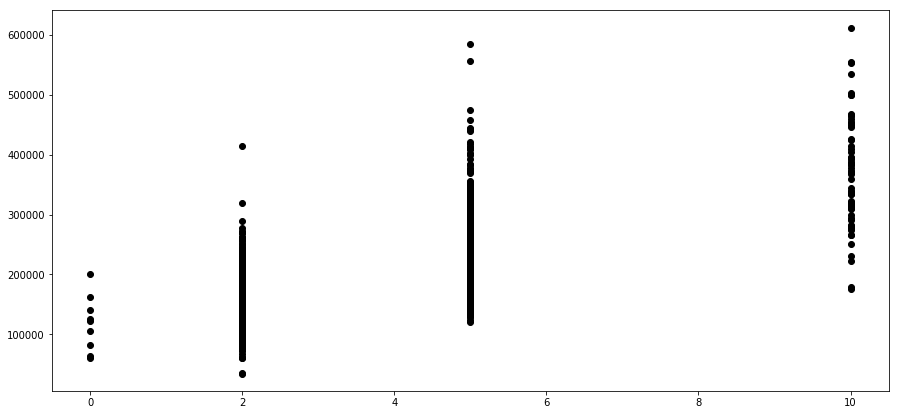

In [38]:
fig = plt.figure(figsize = (15,7))

ax = plt.gca()

ax.scatter(df['Exter Qual'], df['SalePrice'], c = 'k')

In [20]:
target = df[['SalePrice']]

In [32]:
target['Mean_Yhat'] = df['SF'].mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
target['Mean_Residual'] = df['SF'] - target['Mean_Yhat']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y_bar = target['SalePrice'].mean() # Mean for both Y and X
x_bar = df['SF'].mean()
std_y = np.std(df['SalePrice'], ddof = 1) #Standard deviation of both Y and X
std_x = np.std(df['SF'], ddof = 1)
r_xy = df.corr().loc['SF','SalePrice']  #Pearson correlation coefficient between X and Y

beta_1_hat = r_xy *std_y/std_x #Beta-one-hat equation
beta_0_hat = y_bar - beta_1_hat *x_bar #Beta-naught-hat equation

In [ ]:
target['Linear_Yhat'] = beta_0_hat + beta_1_hat * df['SF']

In [ ]:
fig = plt.figure(figsize=(15,7))

ax = plt.gca()

ax.scatter(df['SF'], target['SalePrice'], c='k')
ax.plot(df['SF'], target['Linear_Yhat'], color='r');

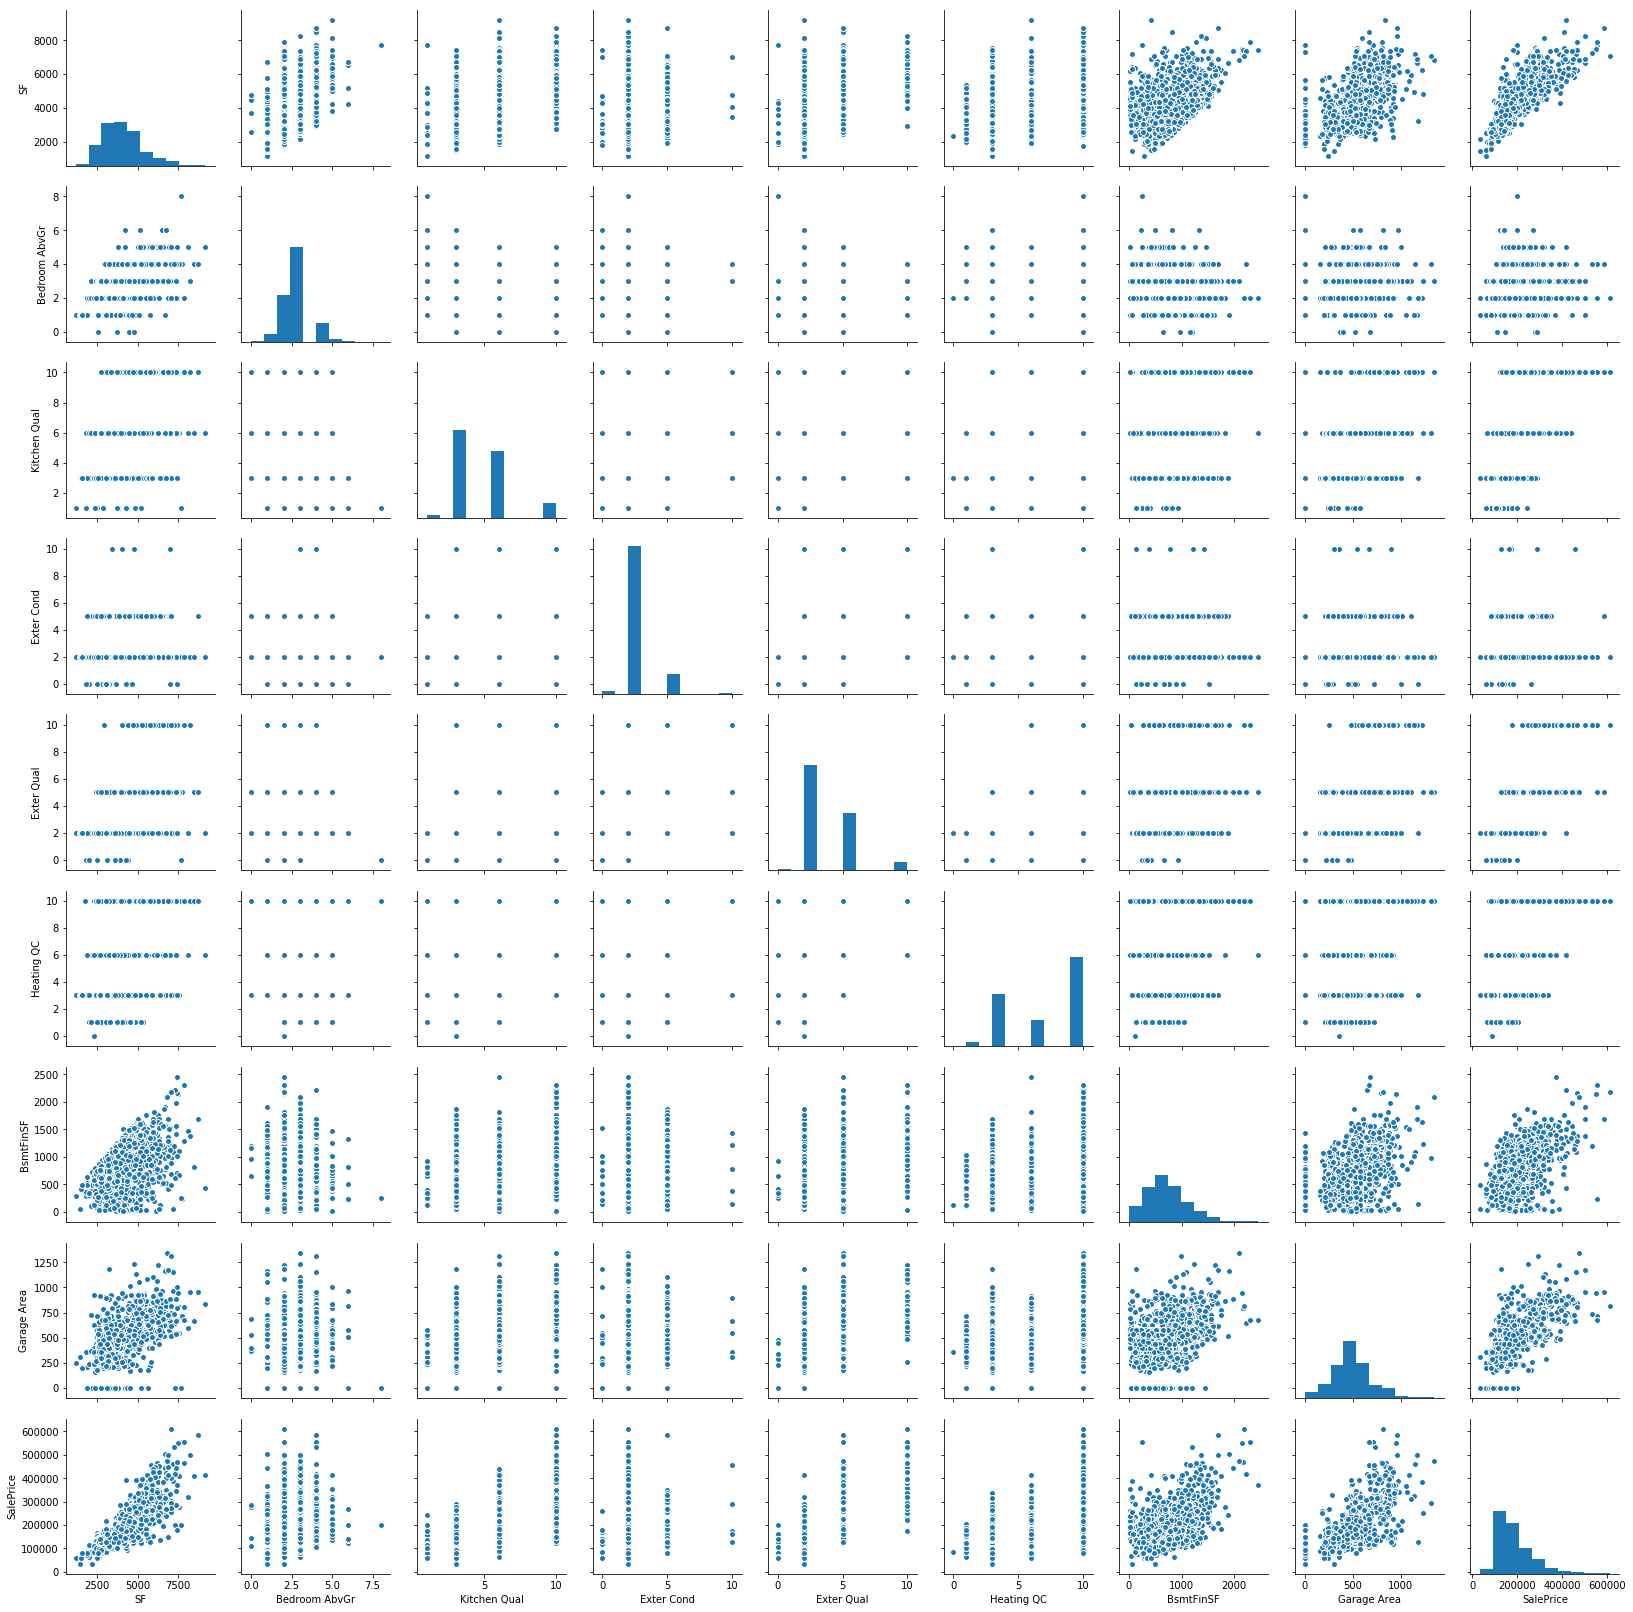

In [139]:
sns.pairplot(df[['SF','Bedroom AbvGr', 'Kitchen Qual', 'Exter Cond', 'Exter Qual', 'Heating QC','BsmtFinSF', 'Garage Area','SalePrice']])

In [40]:
X = df[['SF','Bedroom AbvGr', 'Kitchen Qual', 'Exter Cond', 'Exter Qual', 'Heating QC','BsmtFinSF', 'Garage Area']]

In [41]:
y = df['SalePrice']

In [42]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42)

In [43]:
ss=StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_holdout)
ss.mean_

array([4.06088047e+03, 2.79980564e+00, 4.70359572e+00, 2.36831876e+00,
       3.32750243e+00, 7.04664723e+00, 7.04758017e+02, 4.85225462e+02])

In [44]:
linreg = LinearRegression()

In [45]:
linreg.fit(X_train, y_train)
predictions = linreg.score(X_holdout, y_holdout)
print(linreg.coef_)

[   31.8122489  -4583.91847891  6315.66436672  -196.63487508
  7600.6526377   1387.89109429    24.93080689    48.87643495]


In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8586924859788884

In [47]:
lr.score(X_holdout, y_holdout)

0.8559015059202538

In [48]:
predictions = lr.predict(X_holdout)

In [49]:
r2_score(y_holdout, predictions)

0.8559015059202537

In [150]:
df_test = pd.read_csv("test.csv")

In [151]:
df_test.drop(['PID'], axis = 1, inplace = True)

In [152]:
df_test['SF'] = df_test['1st Flr SF'] + df_test['2nd Flr SF'] + df_test['Total Bsmt SF'] + df_test['Gr Liv Area']

In [153]:
df_test['BsmtFinSF'] = df_test['BsmtFin SF 1'] + df_test['BsmtFin SF 2']

In [154]:
df_test['Kitchen Qual'].replace(to_replace = 'Ex', value = 10., inplace = True)
df_test['Kitchen Qual'].replace(to_replace = 'Gd', value = 6., inplace = True)
df_test['Kitchen Qual'].replace(to_replace = 'TA', value = 3., inplace = True)
df_test['Kitchen Qual'].replace(to_replace = 'Fa', value = 1., inplace = True)
df_test['Kitchen Qual'].replace(to_replace = 'Po', value = 0., inplace = True)

In [155]:
df_test['Heating QC'].replace(to_replace = 'Ex', value = 10, inplace = True)
df_test['Heating QC'].replace(to_replace = 'Gd', value = 6, inplace = True)
df_test['Heating QC'].replace(to_replace = 'TA', value = 3, inplace = True)
df_test['Heating QC'].replace(to_replace = 'Fa', value = 1, inplace = True)
df_test['Heating QC'].replace(to_replace = 'Po', value = 0, inplace = True)

In [156]:
df_test['Exter Cond'].replace(to_replace = 'Ex', value = 10, inplace = True)
df_test['Exter Cond'].replace(to_replace = 'Gd', value = 5, inplace = True)
df_test['Exter Cond'].replace(to_replace = 'TA', value = 2, inplace = True)
df_test['Exter Cond'].replace(to_replace = 'Fa', value = 0, inplace = True)
df_test['Exter Cond'].replace(to_replace = 'Po', value = 0, inplace = True)

In [157]:
df_test['Exter Qual'].replace(to_replace = 'Ex', value = 10, inplace = True)
df_test['Exter Qual'].replace(to_replace = 'Gd', value = 5, inplace = True)
df_test['Exter Qual'].replace(to_replace = 'TA', value = 2, inplace = True)
df_test['Exter Qual'].replace(to_replace = 'Fa', value = 0, inplace = True)
df_test['Exter Qual'].replace(to_replace = 'Po', value = 0, inplace = True)

In [158]:
df_test['SF'].isnull().sum()

0

In [159]:
df_test['Bedroom AbvGr'].isnull().sum()

0

In [160]:
df_test['Kitchen Qual'].isnull().sum()

0

In [161]:
df_test['BsmtFinSF'].isnull().sum()

0

In [162]:
df_test['Garage Area'].isnull().sum()

0

In [164]:
Xt = df_test[['SF','Bedroom AbvGr', 'Kitchen Qual', 'Exter Cond', 'Exter Qual', 'Heating QC','BsmtFinSF', 'Garage Area']]

In [165]:
ss.transform(Xt)
ss.mean_

array([4.06088047e+03, 2.79980564e+00, 4.70359572e+00, 2.36831876e+00,
       3.32750243e+00, 7.04664723e+00, 7.04758017e+02, 4.85225462e+02])

In [166]:
predictions = lr.predict(Xt)

In [167]:
kag = {
    'Id': df_test['Id'],
    'SalePrice': predictions}

In [168]:
datf = pd.DataFrame(kag, columns = ['Id', 'SalePrice'])

In [169]:
datf.to_csv('sale7-1.csv',index=False,)

In [259]:
datf.count()

Id           879
SalePrice    879
dtype: int64